# LInear Regression

## Reference

In [25]:
# Schlimmer,Jeffrey. (1987). Automobile. UCI Machine Learning Repository. https://doi.org/10.24432/C5B01C.
# https://www.kaggle.com/datasets/hellbuoy/car-price-prediction

## Import Library

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
import re
from mlxtend.plotting import heatmap
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## IMport dataset

In [27]:
path = 'https://raw.githubusercontent.com/notfakearcher/julian/main/02_data/car_price.csv'
car = pd.read_csv(path)
car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


## Clean and Organize the dataset

In [28]:
car.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [29]:
object_name = car.select_dtypes('object').columns
# change object to integior type 
le = LabelEncoder()
car[object_name] = car[object_name].apply(le.fit_transform)

# remove the Car Id
car1 = car.copy()
car1 = car1.drop(columns= 'car_ID')


In [30]:
# change the cloumns name to x1 to x25
columnsname = ['x' + str(i) for i in np.arange(1,26)]
car1.columns = columnsname
# standize the dataset
std = StandardScaler()
car1.iloc[:,:] = std.fit_transform(car1.iloc[:,:])


## Correlation Cofficient

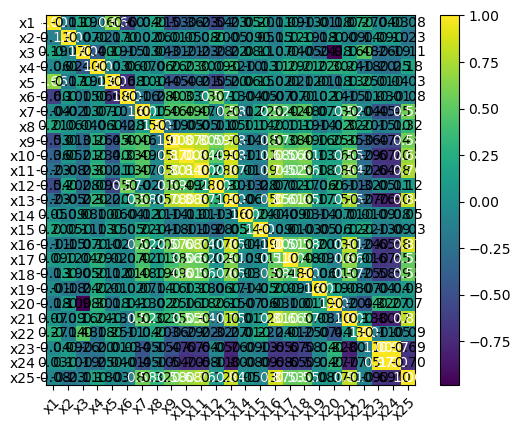

In [32]:
# caculate correlation cofficient
cm = np.corrcoef(car1.T)
hm = heatmap(cm, row_names= car1.columns, column_names= car1.columns)


## LinearRegression

In [35]:
model = LinearRegression()